Please select the algorithm to show the plots : 
1. K-Means
2. HAC
3. DB-SCAN
4. Hadoop K-Means
Enter from 1 to 4 : 4
----------------------------------------------------------
PCA RESULTS


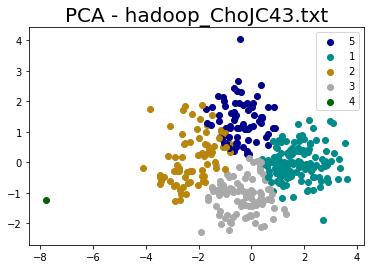

----------------------------------------------------------
PCA RESULTS


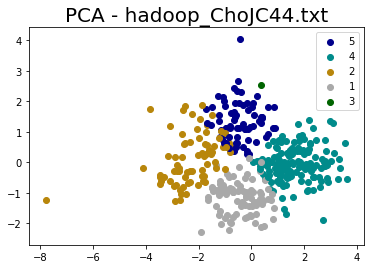

----------------------------------------------------------
PCA RESULTS


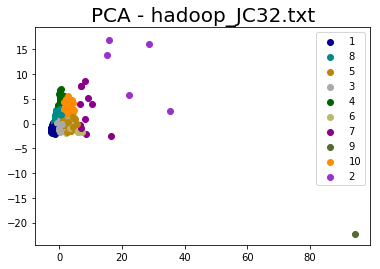

----------------------------------------------------------
PCA RESULTS


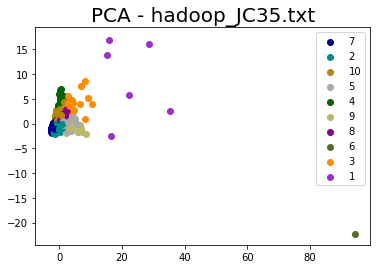

----------------------------------------------------------
PCA RESULTS


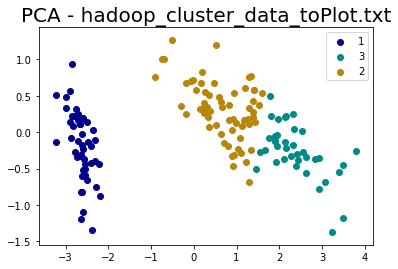

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 26 17:16:02 2017

@author: Anandaraju CS
"""
import numpy as np
from scipy import linalg as LA
import glob
import matplotlib.pyplot as ScatterPlot

cnames = {
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF'}


# PCA for plotting the clusters

print ("Please select the algorithm to show the plots : ")
print ("1. K-Means")
print ("2. HAC")
print ("3. DB-SCAN")
print ("4. Hadoop K-Means")

selected_file = int(input("Enter from 1 to 4 : "))
file_names = []

if selected_file == 1:
    file_names = (glob.glob("kmeans*.txt"))
if selected_file == 2:
    file_names = (glob.glob("hac*.txt"))
if selected_file == 3:
    file_names = (glob.glob("dbscan*.txt"))
if selected_file == 4:
    file_names = (glob.glob("hadoop*.txt"))

for file_name in file_names:
    # read each file and perform PCA
    
    data = np.loadtxt(file_name, dtype='a', delimiter='\t')

    unicode_data = data.view(np.chararray).decode('utf-8')
    cluster_ids = unicode_data[:,-1]

    input_data_str = np.delete(unicode_data, -1, axis=1)
    input_data = input_data_str.astype(float)
    mean_array = input_data.mean(axis = 0)
    input_data_mod = input_data - mean_array
    cov_input_data = np.cov(input_data_mod.T)
    eig_value, eig_vector = LA.eig(cov_input_data)

    eig_vector = eig_vector.T
    max_1_index = 0
    max_1_value = 0
    max_2_index = 0
    max_2_value = 0

    for i in range(0, len(eig_value)):
        if max_1_value <= eig_value[i]:
            max_2_value = max_1_value
            max_2_index = max_1_index
            max_1_value = eig_value[i]
            max_1_index = i
        elif max_2_value < eig_value[i]:
            max_2_value = eig_value[i]
            max_2_index = i


    dim_1_vector = eig_vector[max_1_index]
    dim_2_vector = eig_vector[max_2_index]

    pca_dim_1 = dim_1_vector * input_data_mod
    pca_dim_1 = pca_dim_1.sum(axis=1)

    pca_dim_2 = dim_2_vector * input_data_mod
    pca_dim_2 = pca_dim_2.sum(axis=1)
    
    # map colors to clusters
    
    color_keys = list(cnames.keys())
    color_key_len = len(color_keys)
    
    color_dict = {}
    c_key_count = 0
    for s in cluster_ids:
        if s not in color_dict:
            color_dict[s] = color_keys[c_key_count]
            c_key_count += 1   
            if c_key_count == color_key_len:
                c_key_count = 0

    print("----------------------------------------------------------")
    print("PCA RESULTS")

    #Scatter plot for PCA
    cluster_set1 = set()
    for sp in range(0, len(cluster_ids)):
        if cluster_ids[sp] in cluster_set1:
            ScatterPlot.scatter(pca_dim_1[sp], pca_dim_2[sp], c = color_dict.get(cluster_ids[sp]))
        else:
            cluster_set1.add(cluster_ids[sp])
            ScatterPlot.scatter(pca_dim_1[sp], pca_dim_2[sp], c = color_dict.get(cluster_ids[sp]), label=cluster_ids[sp])
    ScatterPlot.title('PCA - ' + file_name, fontsize=20)
    ScatterPlot.legend()
    ScatterPlot.show()